# Problem Statement

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
salary_train=pd.read_csv('SalaryData_Train.csv.crdownload')
salary_test=pd.read_csv('SalaryData_Test.csv.crdownload')

In [3]:
#viev training set
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#check shape of training set
salary_train.shape

(18645, 14)

In [5]:
#check Test set
salary_test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [6]:
#check shape of testing set
salary_test.shape

(11995, 14)

### EDA & Visualization

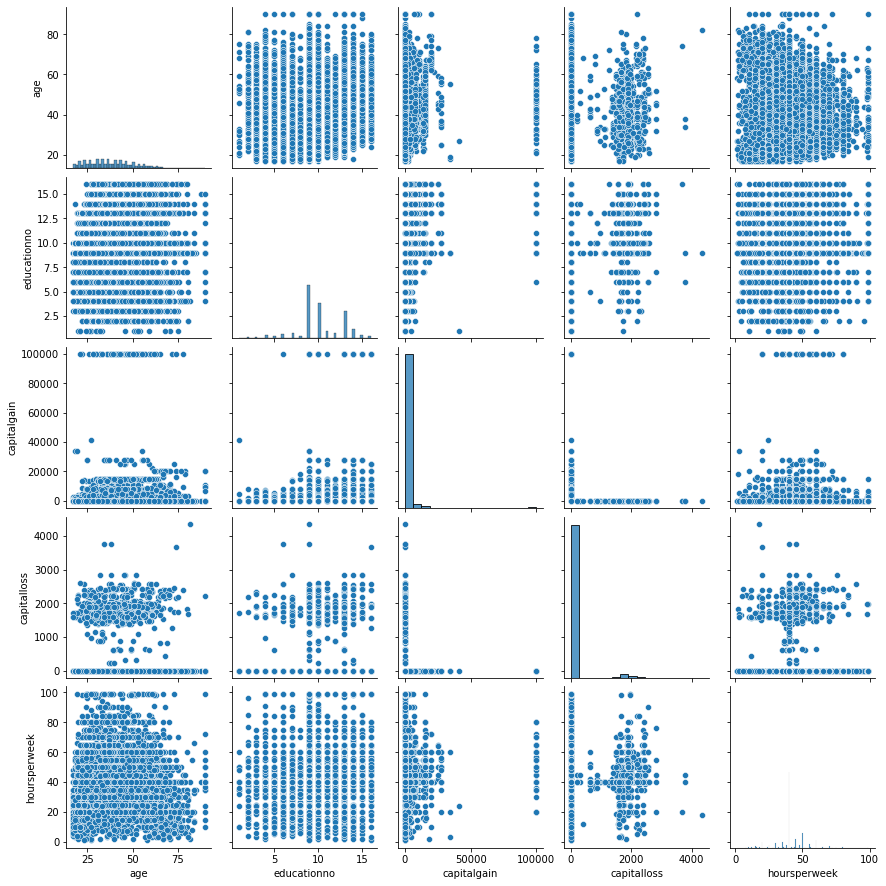

In [7]:
#plot pairplot of training set
sns.pairplot(salary_train)

No much relationship seeing between features.

<AxesSubplot:>

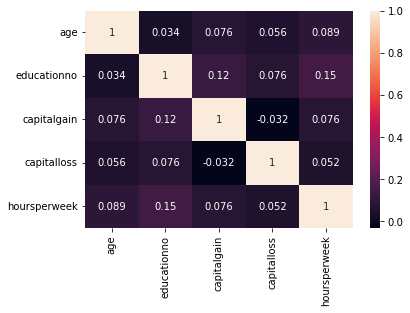

In [8]:
#generate heatmap
sns.heatmap(salary_train.corr(), annot=True)
  

In [9]:
#View summary of  Train Dataset.
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


We can see that there are no missing values in the dataset.


There are 9 Categorical Variables and 5 Numerical variables

## Explore Categorical Variables

In [10]:
#seperate categorical variables
categorical=[var for var in salary_train.columns if salary_train[var].dtype=='O']
print(categorical)


['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [11]:
#View categorical variables
salary_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


There are 9 categorical variables

The categorical variables are 'workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'.

Salary is a Target variable.

### Explore problems within categorical variables

In [12]:
#check missing values
salary_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           1
dtype: int64

There is 1 missing value in Salary.Lets fill missing value by using 'ffill'.

### Explore Salary variable

In [13]:
salary_train['Salary'] = salary_train['Salary'].fillna(method='ffill')

In [14]:
#check unique values in workclass
salary_train.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
#count unique values in Salary
salary_train['Salary'].value_counts()

 <=50K    14066
 >50K      4579
Name: Salary, dtype: int64

In [16]:
#check again missing values.
salary_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

Now We can see that all the 9 categorical variables do not contain any missing values.

In [17]:
#view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salary_train[var].value_counts())

 Private             13735
 Self-emp-not-inc     1569
 Local-gov            1293
 State-gov             787
 Self-emp-inc          664
 Federal-gov           591
 Without-pay             6
Name: workclass, dtype: int64
 HS-grad         6174
 Some-college    4103
 Bachelors       3146
 Masters         1002
 Assoc-voc        800
 11th             636
 Assoc-acdm       604
 10th             524
 7th-8th          341
 Prof-school      316
 9th              277
 Doctorate        231
 12th             213
 5th-6th          171
 1st-4th           87
 Preschool         20
Name: education, dtype: int64
 Married-civ-spouse       8646
 Never-married            6037
 Divorced                 2620
 Separated                 582
 Widowed                   519
 Married-spouse-absent     228
 Married-AF-spouse          13
Name: maritalstatus, dtype: int64
 Prof-specialty       2498
 Craft-repair         2467
 Exec-managerial      2426
 Adm-clerical         2370
 Sales                2246
 Other-servic

## Explore Numerical Variables

In [18]:
#seperate numerical variables
numerical=[var for var in salary_train.columns if salary_train[var].dtype!='O']
print(numerical)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [19]:
#View numerical variables
salary_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


There are 5 numerical variables

The numerical variables are 'age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'.

### Explore problems within numerical variables

In [20]:
#check missing values
salary_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

There is no any missing value in Numerical variables.

## Declare Feature and Target Variable

In [21]:
#Feature X
X=salary_train.drop(['Salary'],axis=1)
#target Y
Y=salary_train['Salary']

In [22]:
#Check shape of feature & target
X.shape,Y.shape

((18645, 13), (18645,))

## Encode Categorical Features

In [23]:
# Encoading features:-
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X)
print(X.info())
X.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Columns: 103 entries, age to native_ Yugoslavia
dtypes: int64(5), uint8(98)
memory usage: 2.5 MB
None


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-Stat,native_ United-States,native_ Vietnam,native_ Yugoslavia
381,24,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7169,28,6,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12609,71,9,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
18563,27,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6282,44,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [25]:
X_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-Stat,native_ United-States,native_ Vietnam,native_ Yugoslavia
18604,48,9,0,0,48,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2957,47,13,0,0,70,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16360,37,11,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12926,35,9,0,0,55,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
433,49,14,0,1977,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


We can see that from the initial 14 columns, we now have 103 columns.

Similarly, I will take a look at the X_test set.

In [26]:
X_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-Stat,native_ United-States,native_ Vietnam,native_ Yugoslavia
9138,22,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10383,50,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14186,60,16,7688,0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6422,60,4,0,0,35,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
273,27,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#check shape of X_train & X_test
X_train.shape,X_test.shape

((13051, 103), (5594, 103))

In [28]:
#check shape of Y_train & Y_test
Y_train.shape,Y_test.shape

((13051,), (5594,))

## Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
#'numpy.ndarray' object has no attribute 'head' so convert into DataFrame
X_train=pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.424658,0.533333,0.0,0.000000,0.479592,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.410959,0.800000,0.0,0.000000,0.704082,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.273973,0.666667,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.246575,0.533333,0.0,0.000000,0.551020,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.438356,0.866667,0.0,0.524403,0.448980,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
#'numpy.ndarray' object has no attribute 'head' so convert into DataFrame
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.068493,0.4,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.8,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.589041,1.0,0.076881,0.0,0.602041,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.589041,0.2,0.000000,0.0,0.346939,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.136986,0.8,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Training

### 1. By using Gaussian Naive bayes

In [32]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

### Predict the results On Salary_train data(Training_set)

In [33]:
# prediction on trained data

Y_pred = gnb.predict(X_test)

Y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [34]:
#check accuracy of training set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.4844476224526278

WE train our data on salary_train dataset & also predict on same salary_train dataset,we got 48% accuracy.

### Predict the results On Salary_test data (Testing_set)

Now we will test on salary_test data which is unknown for model & we do prediction.

In [35]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [36]:
#check null values
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [37]:
#fill null values with 'ffill' method
salary_test=salary_test.fillna(method='ffill')

In [38]:
#devide salary_test dataset into x_test & y_test
x_test=salary_test.drop(['Salary'],axis=1)
y_test=salary_test['Salary']

In [39]:
# Encoading:-

x_test = pd.get_dummies(x_test)
#y_test = le.fit_transform(y_test)

In [40]:
# Scaling:-

x_test = scaler.fit_transform(x_test)

In [41]:
# prediction on salary_test data

y_pred = gnb.predict(x_test)

y_pred

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

### Accuracy Check

In [42]:
#check accuracy for test_set
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5266360983743227

WE train our data on salary_train dataset(training set) but now we have predict on salary_test dataset(testing set) which is unknown for model ,we got 52% accuracy.

### Check for Overfitting and Underfitting

In [43]:
# Printing the scores on training set and testing set:-
print("Training_set accuracy:","  ",accuracy_score(Y_test,Y_pred))
print("Test_set accuracy:","  ",accuracy_score(y_test,y_pred))



Training_set accuracy:    0.4844476224526278
Test_set accuracy:    0.5266360983743227


The training-set accuracy score is 48%. while the test-set accuracy to be 52%. These two values are quite comparable. So, there is no sign of overfitting & Underfitting.

### Classification Report

In [44]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.43      0.58      9070
        >50K       0.32      0.83      0.46      2925

    accuracy                           0.53     11995
   macro avg       0.60      0.63      0.52     11995
weighted avg       0.75      0.53      0.55     11995



f1-score is the weighted harmonic mean of precision and recall.

The best possible f1-score would be 1.0 and the worst would be 0.0. 

From above classification report we conclude that we have balanced class distribution.

### 2. By using Multinominal Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train,Y_train)

MultinomialNB()

### Predict the results On Salary_test data (Testing_set)

In [46]:
# prediction:-

y_pred = mnb.predict(x_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [47]:
#check accuracy for test_set
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7858274280950396

#### Conclusion:
MultinominalNB model gives 78% accuracy and Gaussian Naive bayes gives 52% accuracy. 

So we can conclude that MultinominalNB is perform better than GaussianNB.